In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#importing the dataset
dataset= pd.read_csv("C:\\Users\\Hari Krishna\\Desktop\\KPMG - EDA\\df.csv", na_values = "-")
dataset

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.90,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3


# Data Cleaning

In [ ]:
dataset['risk_level'].replace({1:'Low', 2:'Moderately Low', 3:'Moderate', 4:'Moderately High', 5:'High', 6:'Very High'},inplace=True)

In [ ]:
# checking the size of data (rows,columns)
dataset.shape

(814, 20)

In [ ]:
# checking for null values and column, checking if the datatypes are correct
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [ ]:
#checking null values
dataset.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [ ]:
#checking for duplicates
dataset.duplicated().sum()

0

In [ ]:
#checking null values in 3years and 5years
dataset[dataset['returns_3yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000,5000,0.16,416.0,2,Aditya Pagaria,NaN,NaN,NaN,NaN,NaN,Moderately Low,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
104,Baroda BNP Paribas Banking & PSU Bond Fund,500,5000,0.39,40.0,2,Prashant Pimple,NaN,NaN,NaN,NaN,NaN,Moderately Low,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF – April 2025 – Direct Growth,500,1000,0.06,3912.0,3,Dhawal Dalal,NaN,NaN,NaN,NaN,NaN,Moderately Low,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500,500,0.24,983.0,2,Kedar Karnik,NaN,NaN,NaN,NaN,NaN,Moderately Low,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000,1000,0.40,306.0,2,Vikas Garg,NaN,NaN,NaN,NaN,NaN,Moderate,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking & PSU Debt Fund,500,5000,0.15,27.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500,5000,0.14,57.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500,5000,0.10,119.0,2,Vikrant Mehta,NaN,NaN,NaN,NaN,NaN,Moderately Low,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
495,Mahindra Manulife Short Duration Fund,500,1000,0.29,43.0,2,Rahul Pal,NaN,NaN,NaN,NaN,NaN,Moderate,Mahindra Manulife Mutual Fund,3,Debt,Short Duration Funds,4.4,NaN,NaN
497,Mirae Asset Banking and PSU Debt Fund,1000,5000,0.34,89.0,3,Basant Bafna,NaN,NaN,NaN,NaN,NaN,Moderately Low,Mirae Asset Mutual Fund,3,Debt,Banking and PSU Mutual Funds,3.7,NaN,NaN


In [ ]:
#there are null values becuase the age of the fund is less than 3 years, so there are null values for 3 years
#the same applies for 5 years if the age of the stock is less than 5 years

In [ ]:
dataset[dataset['returns_5yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,Low,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
41,Aditya Birla SL Retirement-The 30s Plan-Dir Gr...,500,1000,1.06,258.0,4,Dhaval Shah,2.41,-5.61,14.94,0.84,0.94,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,0.0,17.9,NaN
42,Aditya Birla SL Retirement-The 40s Plan-Dir Gr...,500,1000,1.07,91.0,4,Dhaval Shah,2.34,-3.14,11.86,0.77,0.93,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,-0.1,15.0,NaN
43,Aditya Birla SL Retirement-The 50s Plan-Dir Gr...,500,1000,0.63,27.0,4,Dhaval Shah,0.29,-2.04,2.99,0.34,0.13,Moderately High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,3.0,4.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,UTI-Equity Savings Fund,0,5000,0.68,257.0,5,V Srivatsa,4.06,3.98,5.99,0.91,1.75,Moderate,UTI Mutual Fund,4,Hybrid,Equity Savings Mutual Funds,6.1,14.7,NaN
786,UTI-Floater Fund,500,500,0.35,1637.0,4,Sudhir Agrawal,3.07,3.41,1.05,1.41,1.45,Moderately Low,UTI Mutual Fund,3,Debt,Floater Mutual Funds,5.1,5.9,NaN
801,UTI-Nifty Next 50 Index Fund,0,5000,0.33,1926.0,5,Sharwan Kumar Goyal,1.71,-4.62,18.16,0.99,0.97,Very High,UTI Mutual Fund,2,Other,Index Funds,-6.4,22.2,NaN
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,Low,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN


In [ ]:
# hence proved
#now filling the null values with mean by category of the stock

In [ ]:
#calculating mean for returns using groupby function
mean_returns_by_category = dataset.groupby('category').agg({'returns_3yr': 'mean' ,'returns_5yr': 'mean'})
mean_returns_by_category

,returns_3yr,returns_5yr
category,,
Debt,6.228517,6.385446
Equity,29.738111,12.069767
Hybrid,15.272414,8.581053
Other,20.792405,10.710938
Solution Oriented,18.167857,9.747059


In [ ]:
#calculating mean for ratios by category('sortino','alpha','sd','beta','sharpe')
mean_ratios_by_category = dataset.groupby('category').agg({'sortino': 'mean', 'alpha': 'mean', 'sd': 'mean',
                                                           'beta':'mean', 'sharpe': 'mean'})
mean_ratios_by_category

,sortino,alpha,sd,beta,sharpe
category,,,,,
Debt,2.139885,2.160000,2.092107,0.807214,0.892366
Equity,3.110392,3.402550,16.959477,0.878642,1.459837
Hybrid,2.776552,2.486034,7.493190,0.707155,1.311638
Other,2.420633,0.513594,15.480506,0.850938,1.090253
Solution Oriented,2.589286,0.700357,10.272143,0.765714,1.204286


In [ ]:
#filling the missing values with mean
dataset['returns_3yr'] = dataset.groupby('category')['returns_3yr'].transform(lambda x: x.fillna(x.mean()))
dataset['returns_5yr'] = dataset.groupby('category')['returns_5yr'].transform(lambda x: x.fillna(x.mean()))
dataset['sortino'] = dataset.groupby('category')['sortino'].transform(lambda x: x.fillna(x.mean()))
dataset['alpha'] = dataset.groupby('category')['alpha'].transform(lambda x: x.fillna(x.mean()))
dataset['sd'] = dataset.groupby('category')['sd'].transform(lambda x: x.fillna(x.mean()))
dataset['beta'] = dataset.groupby('category')['beta'].transform(lambda x: x.fillna(x.mean()))
dataset['sharpe'] = dataset.groupby('category')['sharpe'].transform(lambda x: x.fillna(x.mean()))
dataset.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [ ]:
dataset.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.640883,2.464598,10.084476,0.822852,1.197011,2.641278,3.921376,18.254880,9.389900
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.374909,3.859215,7.808093,1.275605,0.531163,1.463476,6.675502,12.101639,3.497044
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.513594,2.092107,0.710000,0.894275,2.000000,1.500000,6.228517,6.389085
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.825000,1.885000,11.870000,0.850938,1.290000,3.000000,4.400000,18.050000,8.800000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.410000,0.960000,1.540000,4.000000,5.600000,27.000000,12.069767
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,5.000000,130.800000,71.400000,23.200000


# Data Visualization and EDA

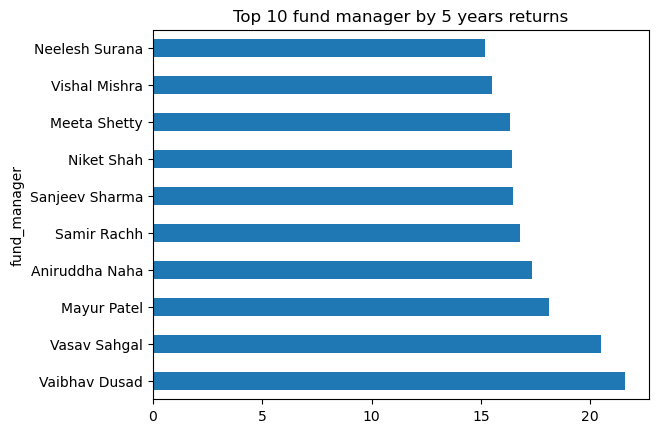

In [ ]:
ax[0] = dataset.groupby('fund_manager')['returns_5yr'].mean().nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')
plt.show()

In [ ]:
#creating category wise DataFrames
Debt = dataset[dataset['category'] == "Debt"]
Equity = dataset[dataset['category'] == "Equity"]
Hybrid = dataset[dataset['category'] == "Hybrid"]
Other = dataset[dataset['category'] == "Other"]
Solution = dataset[dataset['category'] == "Solution"]

In [ ]:
top_5_debt = Debt.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_equity = Equity.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_hybrid = Hybrid.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_solution = Solution.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()
top_5_other = Other.groupby('fund_manager')['returns_5yr'].mean().nlargest(5).reset_index()

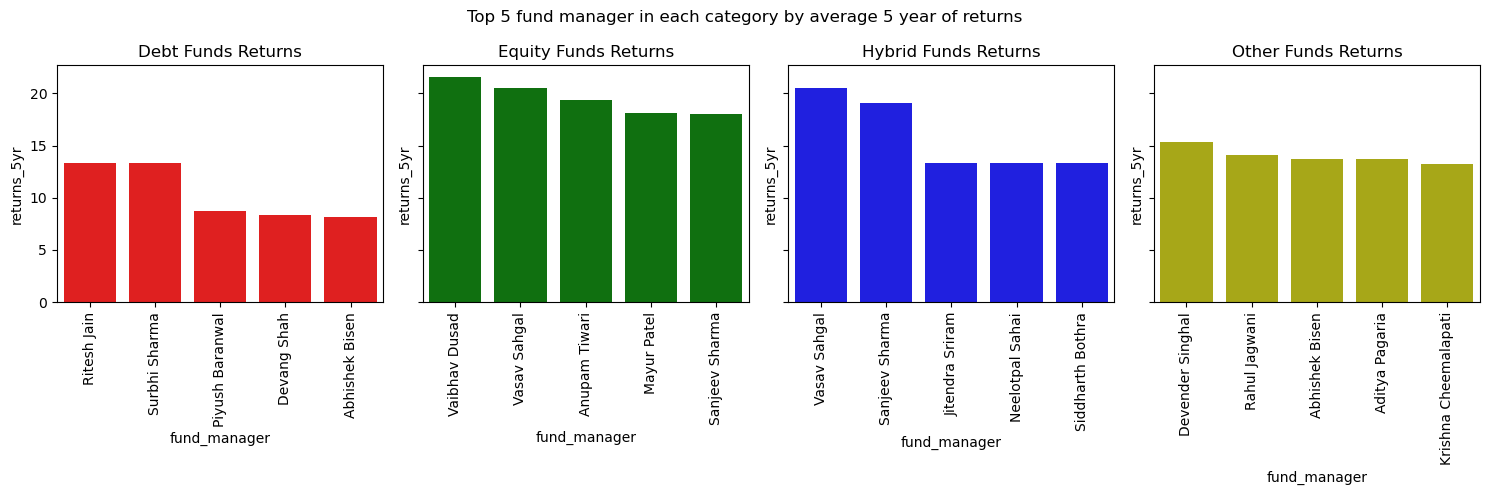

In [ ]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(15, 5),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0], color='r')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1], color='g')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2], color='b')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[3], color='y')

# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')

ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')

ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')

ax[3].set_title('Other Funds Returns')
ax[3].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

#final plot
plt.suptitle('Top 5 fund manager in each category by average 5 year of returns')
plt.tight_layout()
plt.show()

Conclusion:

In the Debt category Ritesh Jain has managed to give higest returns.

In the Equity category Vaibhav Dusad has managed to give highest returns.

In the Hybrid category Vasav Sahgal has managed to give highest returns.

In the Solution Funds category Srinivasan Ramamurthy has managed to give highest returns.

In the Other Funds category Devender Singhal has managed to give highest returns.

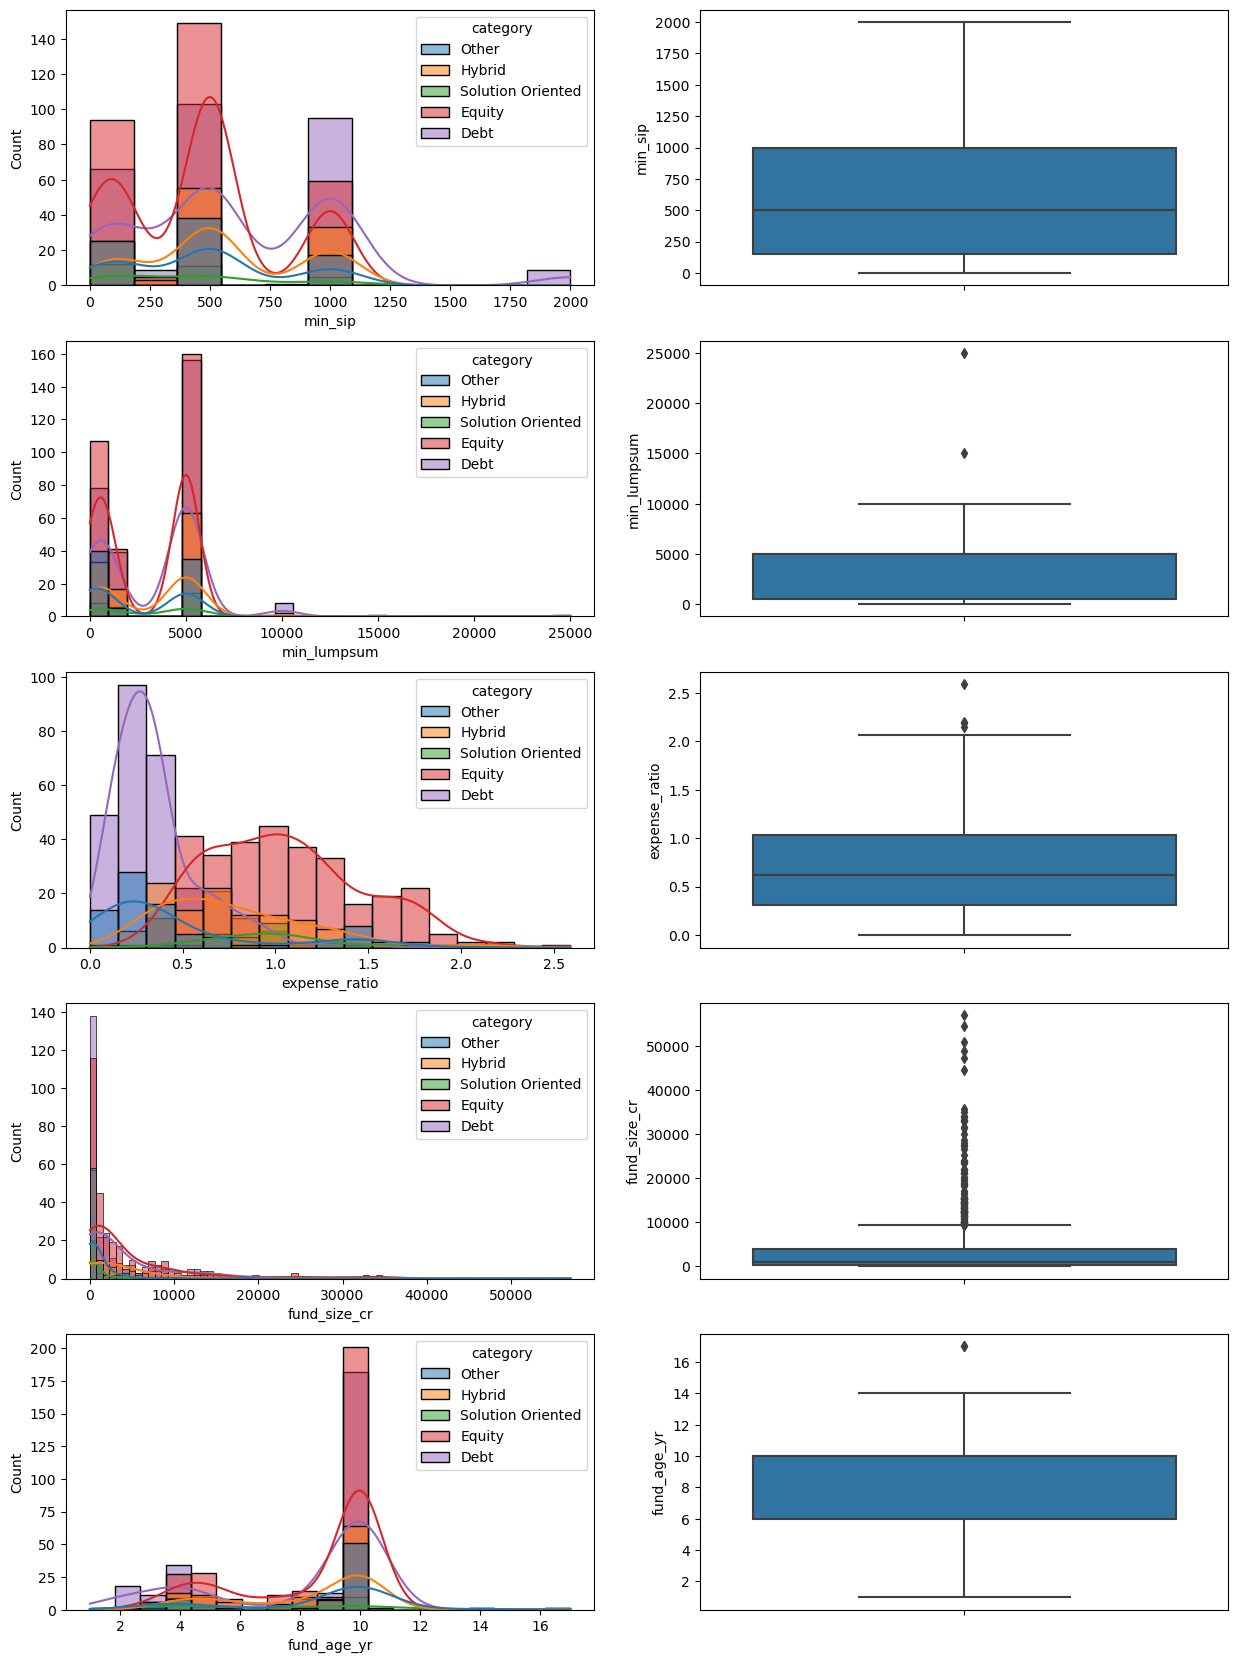

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(15, 8))

sns.histplot(dataset, x='min_sip',hue='category',ax=ax[0,0],kde=True)
sns.histplot(dataset, x='min_lumpsum',hue='category',ax=ax[1,0],kde=True)
sns.histplot(dataset, x='expense_ratio', hue='category',ax=ax[2,0],kde=True)
sns.histplot(dataset, x='fund_size_cr',hue='category',ax=ax[3,0],kde=True)
sns.histplot(dataset, x='fund_age_yr',hue='category', ax=ax[4,0],kde=True)


sns.boxplot(data = dataset, y=dataset['min_sip'],ax=ax[0,1])
sns.boxplot(data = dataset, y=dataset['min_lumpsum'],ax=ax[1,1])
sns.boxplot(data = dataset, y=dataset['expense_ratio'],ax=ax[2,1])
sns.boxplot(data = dataset, y=dataset['fund_size_cr'], ax=ax[3,1])
sns.boxplot(data = dataset, y=dataset['fund_age_yr'],ax=ax[4,1])




plt.subplots_adjust(bottom=5,top=7)

Conclusion

Most of the funds have Minimum SIP amount as 0,500 and 1000

Most of the funds have Minimum Lumpsum amount between 0 to 5000

Expense ratio of most of the schemes lies between 0 to 1

Most of the fund size is less than 2000 Cr. and has lot of outliers

Recent funds are mostly Debt funds, More than 4 year age funds are Equity type followed by Debt.


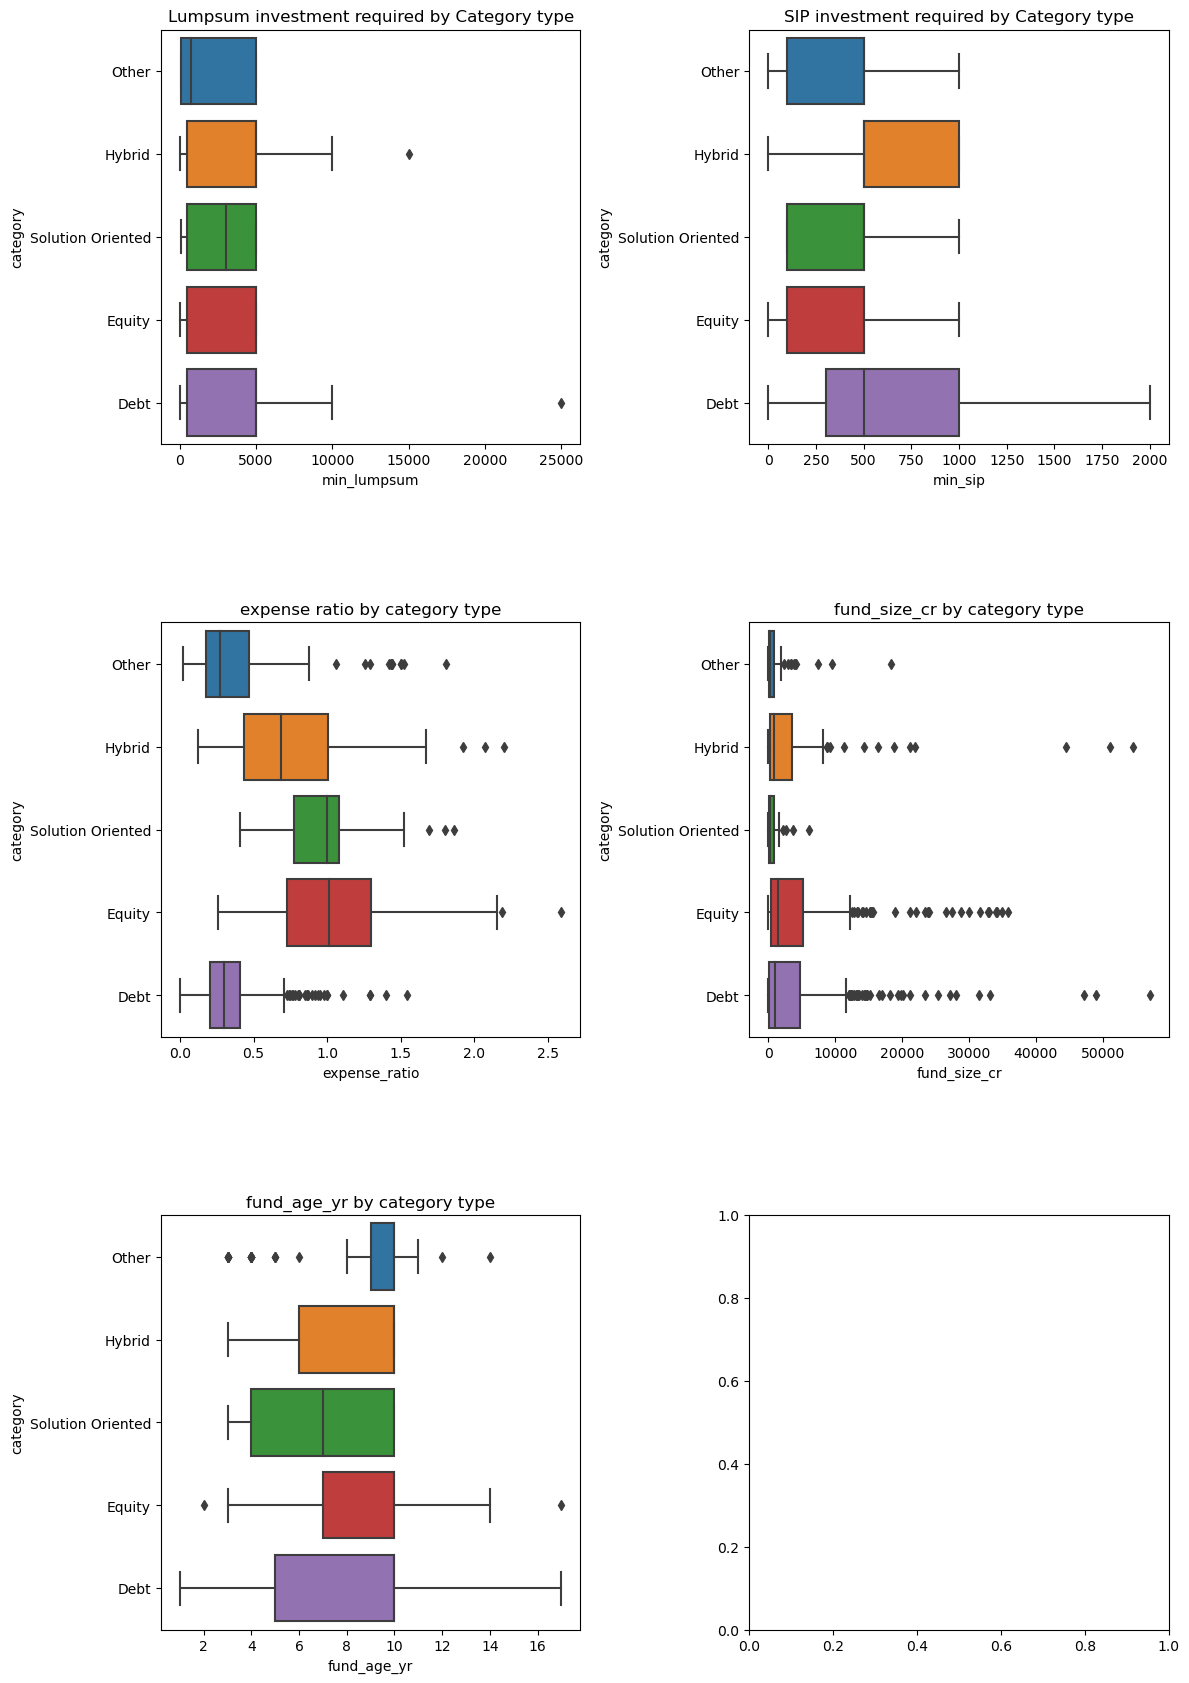

In [ ]:
# distribution of data by category type
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.boxplot(data = dataset,y=dataset['category'],x=dataset['min_lumpsum'],ax=axes[0,0])
sns.boxplot(data = dataset,y=dataset['category'],x=dataset['min_sip'],ax=axes[0,1])
sns.boxplot(dataset,y=dataset['category'],x=dataset['expense_ratio'],ax=axes[1,0])
sns.boxplot(dataset, y=dataset['category'], x=dataset['fund_size_cr'],ax=axes[1,1])
sns.boxplot(dataset, y=dataset['category'], x=dataset['fund_age_yr'],ax=axes[2,0])

axes[0,0].set_title('Lumpsum investment required by Category type')
axes[0,1].set_title('SIP investment required by Category type')
axes[1,0].set_title('expense ratio by category type')
axes[1,1].set_title('fund_size_cr by category type')
axes[2,0].set_title('fund_age_yr by category type')

plt.tight_layout()
plt.subplots_adjust(bottom=8,top=10)
plt.show()

Conclusion

#Across fund type lumpum investment is almost same.

#Across fund type sip investment is high among Hybrid and Debt funds.

#Equity and Solution oriented funds have the highest expense ratio among funds.

#Across fund type size cr highiest is among equity and Debt funds.

#Across fund type age yr Debt has most recent funds.

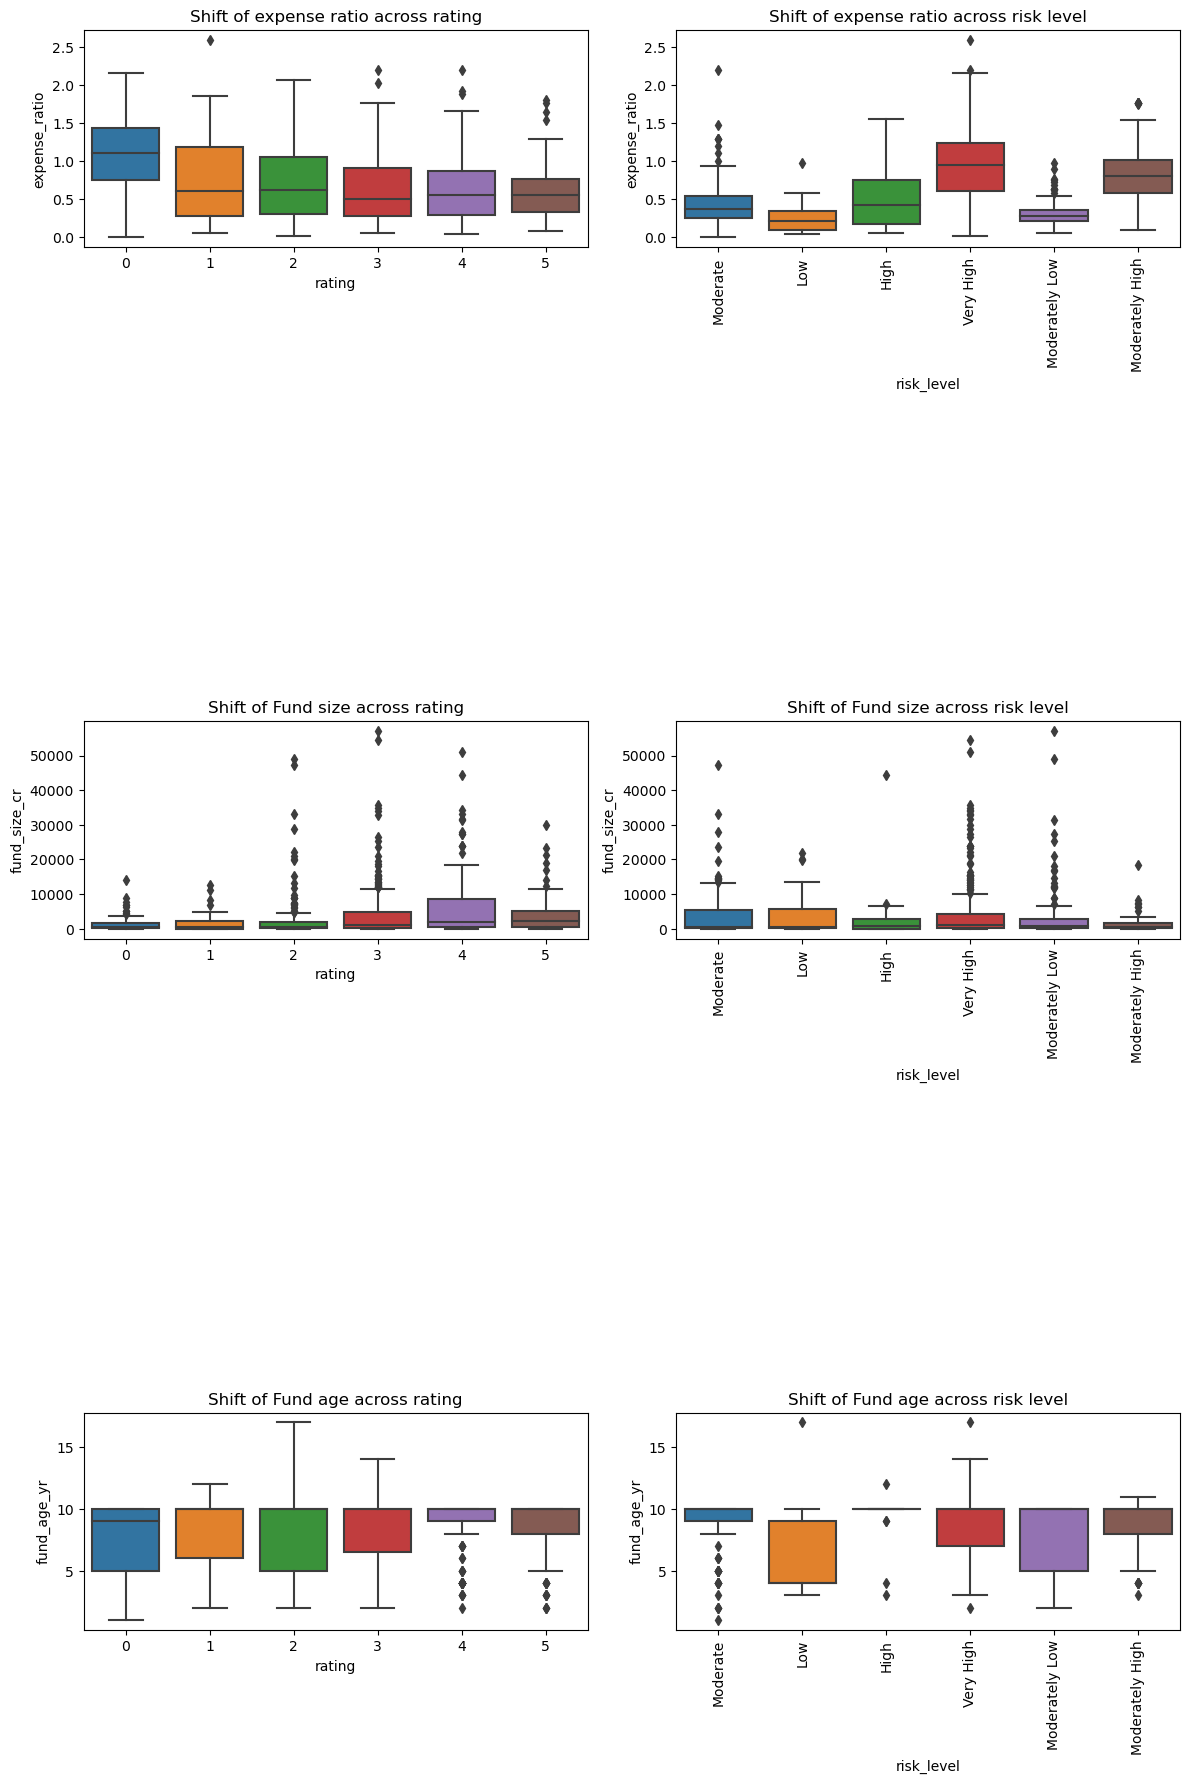

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.boxplot(dataset,x='rating',y='expense_ratio', ax=ax[0,0])
sns.boxplot(dataset,x='rating', y='fund_size_cr', ax=ax[1,0])
sns.boxplot(dataset,x='rating', y='fund_age_yr', ax=ax[2,0])

sns.boxplot(dataset,x='risk_level',y='expense_ratio', ax=ax[0,1])
sns.boxplot(dataset, x='risk_level', y='fund_size_cr', ax=ax[1,1])
sns.boxplot(dataset, x='risk_level', y='fund_age_yr', ax=ax[2,1])

ax[0,0].set_title('Shift of expense ratio across rating')
ax[0,1].set_title('Shift of expense ratio across risk level')
ax[0,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())
ax[1,0].set_title('Shift of Fund size across rating')
ax[1,1].set_title('Shift of Fund size across risk level')
ax[1,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())
ax[2,0].set_title('Shift of Fund age across rating')
ax[2,1].set_title('Shift of Fund age across risk level')2
ax[2,1].set_xticklabels(rotation='vertical',labels=dataset['risk_level'].unique())

plt.tight_layout()
plt.subplots_adjust(bottom=8,top=10)
plt.show()

conclusion

The higher rating funds is, the lower the expense ratio is.

Most of the Very high risk funds are from Equity and equity fund has high expense ratio.

Most of the funds are invested in risk level High and Very High, People seems to be interested in investing higher rated funds.

Most of the schemes have risk level Very High by fund age

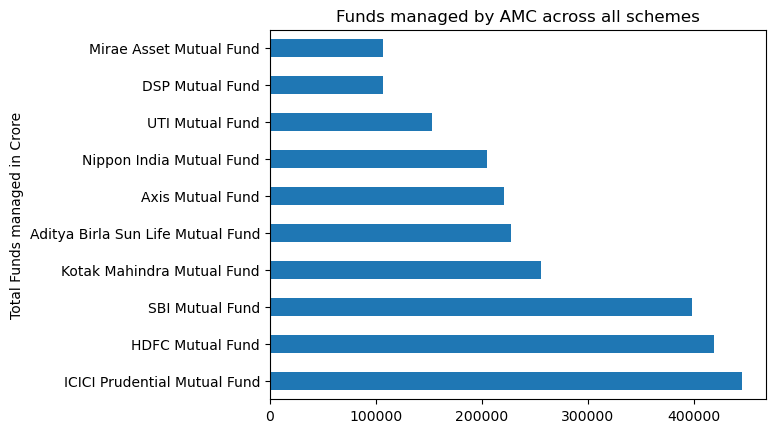

In [ ]:
# top 10 AMC by sum of funds managed
dataset.groupby('amc_name')['fund_size_cr'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Total Funds managed in Crore')
plt.title('Funds managed by AMC across all schemes')
plt.show()

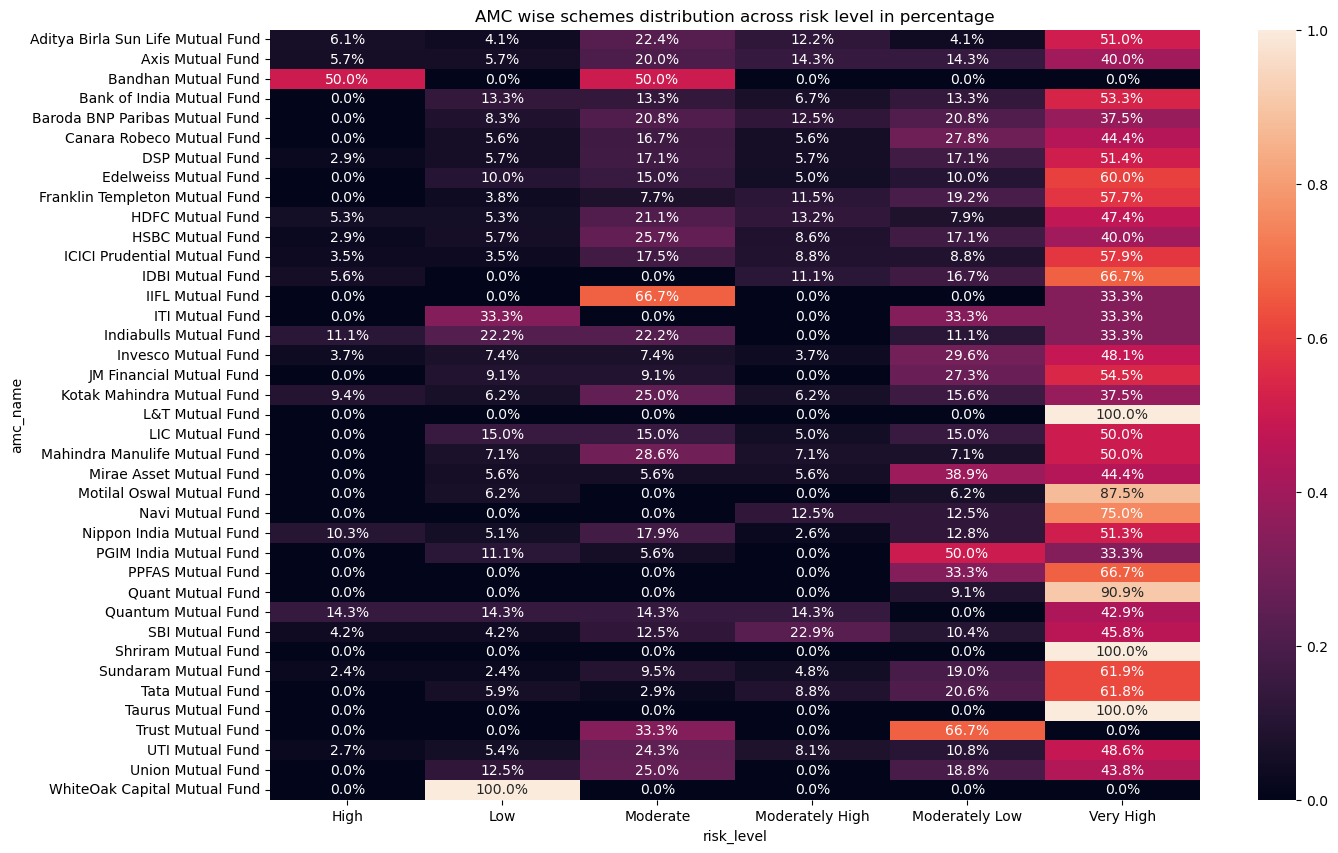

In [ ]:
# amc and risk level
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(dataset['amc_name'],dataset['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

Most of the AMCs have schemes with risk level 6(Very High).

Taurus, Shriram and L&T have 100% in Very High Risk category.

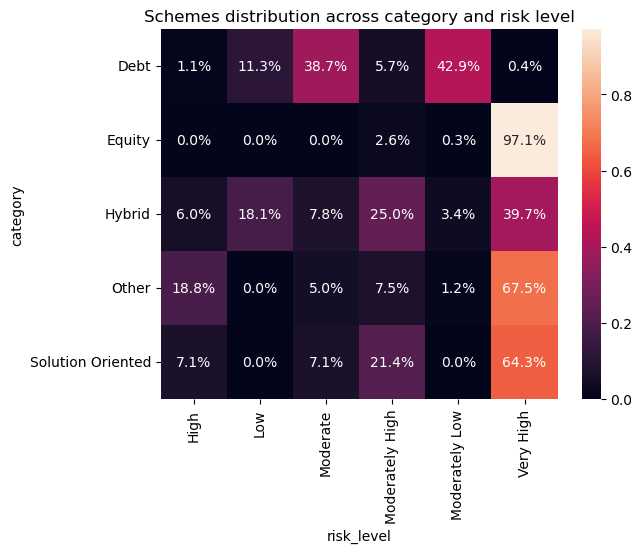

In [ ]:
sns.heatmap(pd.crosstab(dataset['category'],dataset['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

Conclusion

In 3 and 5 years returns have a positive relation with risk level.

It clearly shows that high risk funds should be held for longer time to get more returns.

# Analysis on Alpha, Beta, SD, Sharpe, Sortino

sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund

alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark

sd: The standard deviation of the fund's returns

beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market

sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset

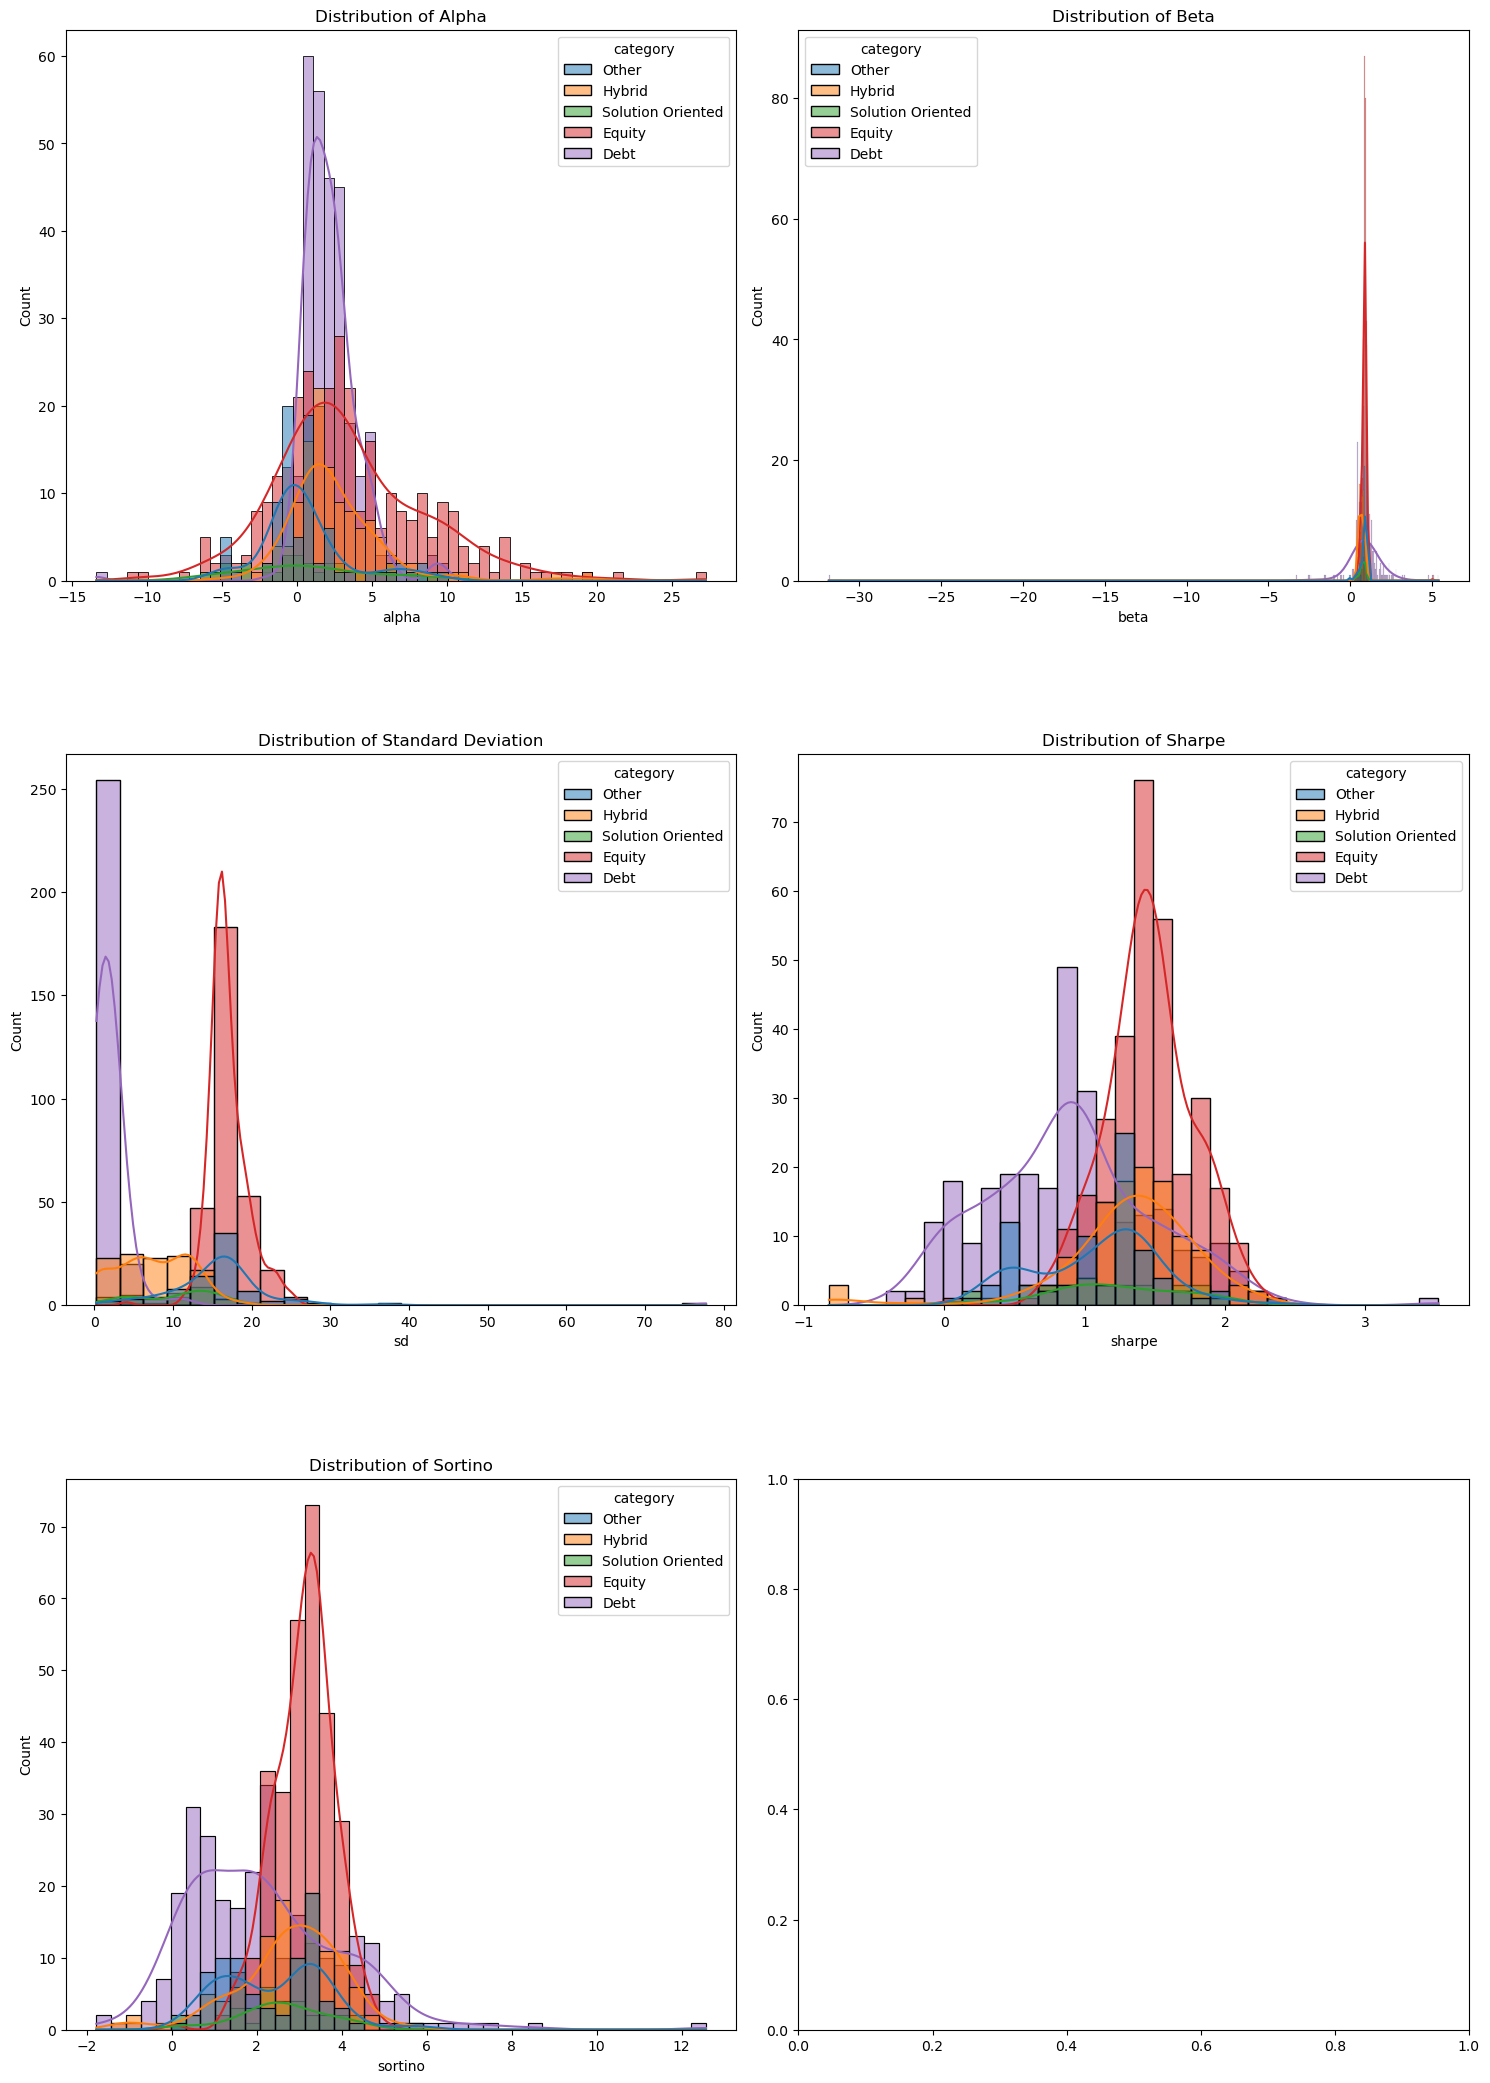

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))
sns.histplot(dataset, x='alpha', hue='category', ax=ax[0,0], kde=True)
sns.histplot(dataset, x='beta', hue='category', ax=ax[0,1], kde=True)
sns.histplot(dataset, x='sd', hue='category', ax=ax[1,0], kde=True)
sns.histplot(dataset, x='sharpe', hue='category', ax=ax[1,1], kde=True)
sns.histplot(dataset, x='sortino', hue='category', ax=ax[2,0], kde=True)

ax[0,0].set_title('Distribution of Alpha')
ax[0,1].set_title('Distribution of Beta')
ax[1,0].set_title('Distribution of Standard Deviation')
ax[1,1].set_title('Distribution of Sharpe')
ax[2,0].set_title('Distribution of Sortino')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

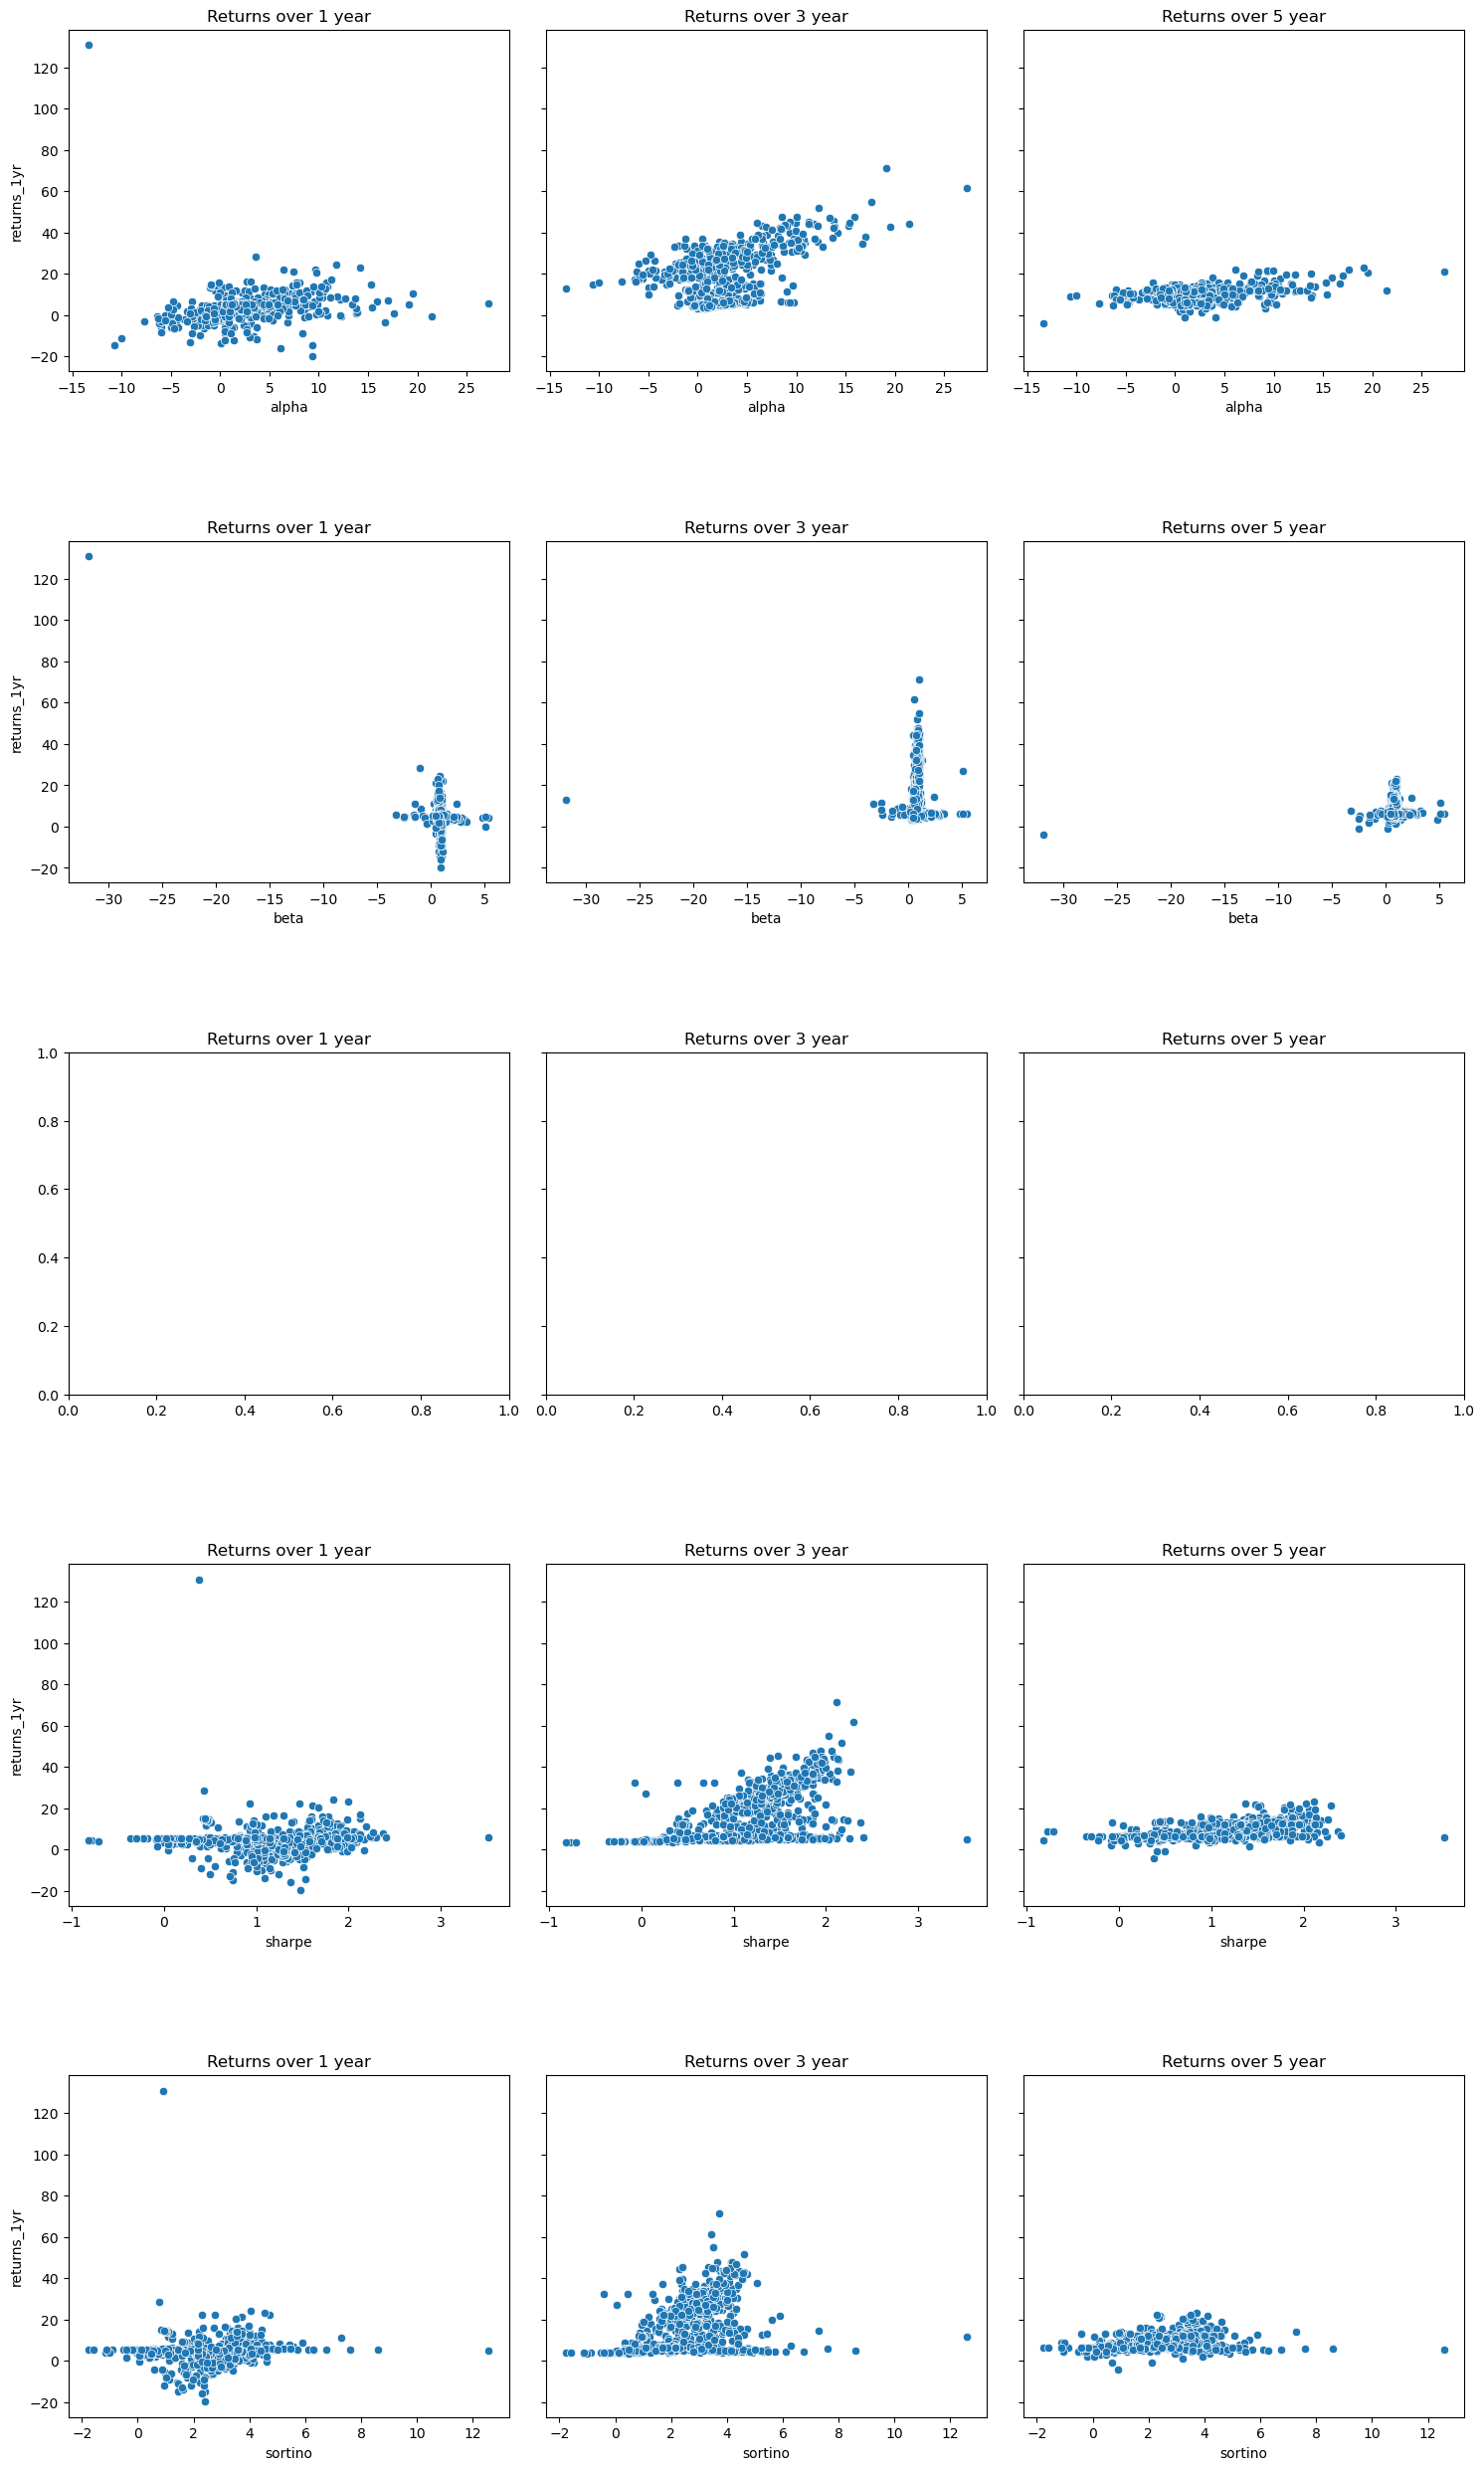

In [ ]:
# Create figure and axis objects
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12),sharey='row')

# Create a scatter plot for each axis
sns.scatterplot(dataset,x='alpha',y='returns_1yr',ax=axes[0,0])
sns.scatterplot(dataset,x='alpha',y='returns_3yr',ax=axes[0,1])
sns.scatterplot(dataset,x='alpha',y='returns_5yr',ax=axes[0,2])
sns.scatterplot(dataset,x='beta',y='returns_1yr',ax=axes[1,0])
sns.scatterplot(dataset,x='beta',y='returns_3yr',ax=axes[1,1])
sns.scatterplot(dataset,x='beta',y='returns_5yr',ax=axes[1,2])
sns.scatterplot(dataset,x='sharpe',y='returns_1yr',ax=axes[3,0])
sns.scatterplot(dataset,x='sharpe',y='returns_3yr',ax=axes[3,1])
sns.scatterplot(dataset,x='sharpe',y='returns_5yr',ax=axes[3,2])
sns.scatterplot(dataset,x='sortino',y='returns_1yr',ax=axes[4,0])
sns.scatterplot(dataset,x='sortino',y='returns_3yr',ax=axes[4,1])
sns.scatterplot(dataset,x='sortino',y='returns_5yr',ax=axes[4,2])

# Set the title for each axis
axes[0,0].set_title('Returns over 1 year')
axes[0,1].set_title('Returns over 3 year')
axes[0,2].set_title('Returns over 5 year')
axes[1,0].set_title('Returns over 1 year')
axes[1,1].set_title('Returns over 3 year')
axes[1,2].set_title('Returns over 5 year')
axes[2,0].set_title('Returns over 1 year')
axes[2,1].set_title('Returns over 3 year')
axes[2,2].set_title('Returns over 5 year')
axes[3,0].set_title('Returns over 1 year')
axes[3,1].set_title('Returns over 3 year')
axes[3,2].set_title('Returns over 5 year')
axes[4,0].set_title('Returns over 1 year')
axes[4,1].set_title('Returns over 3 year')
axes[4,2].set_title('Returns over 5 year')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

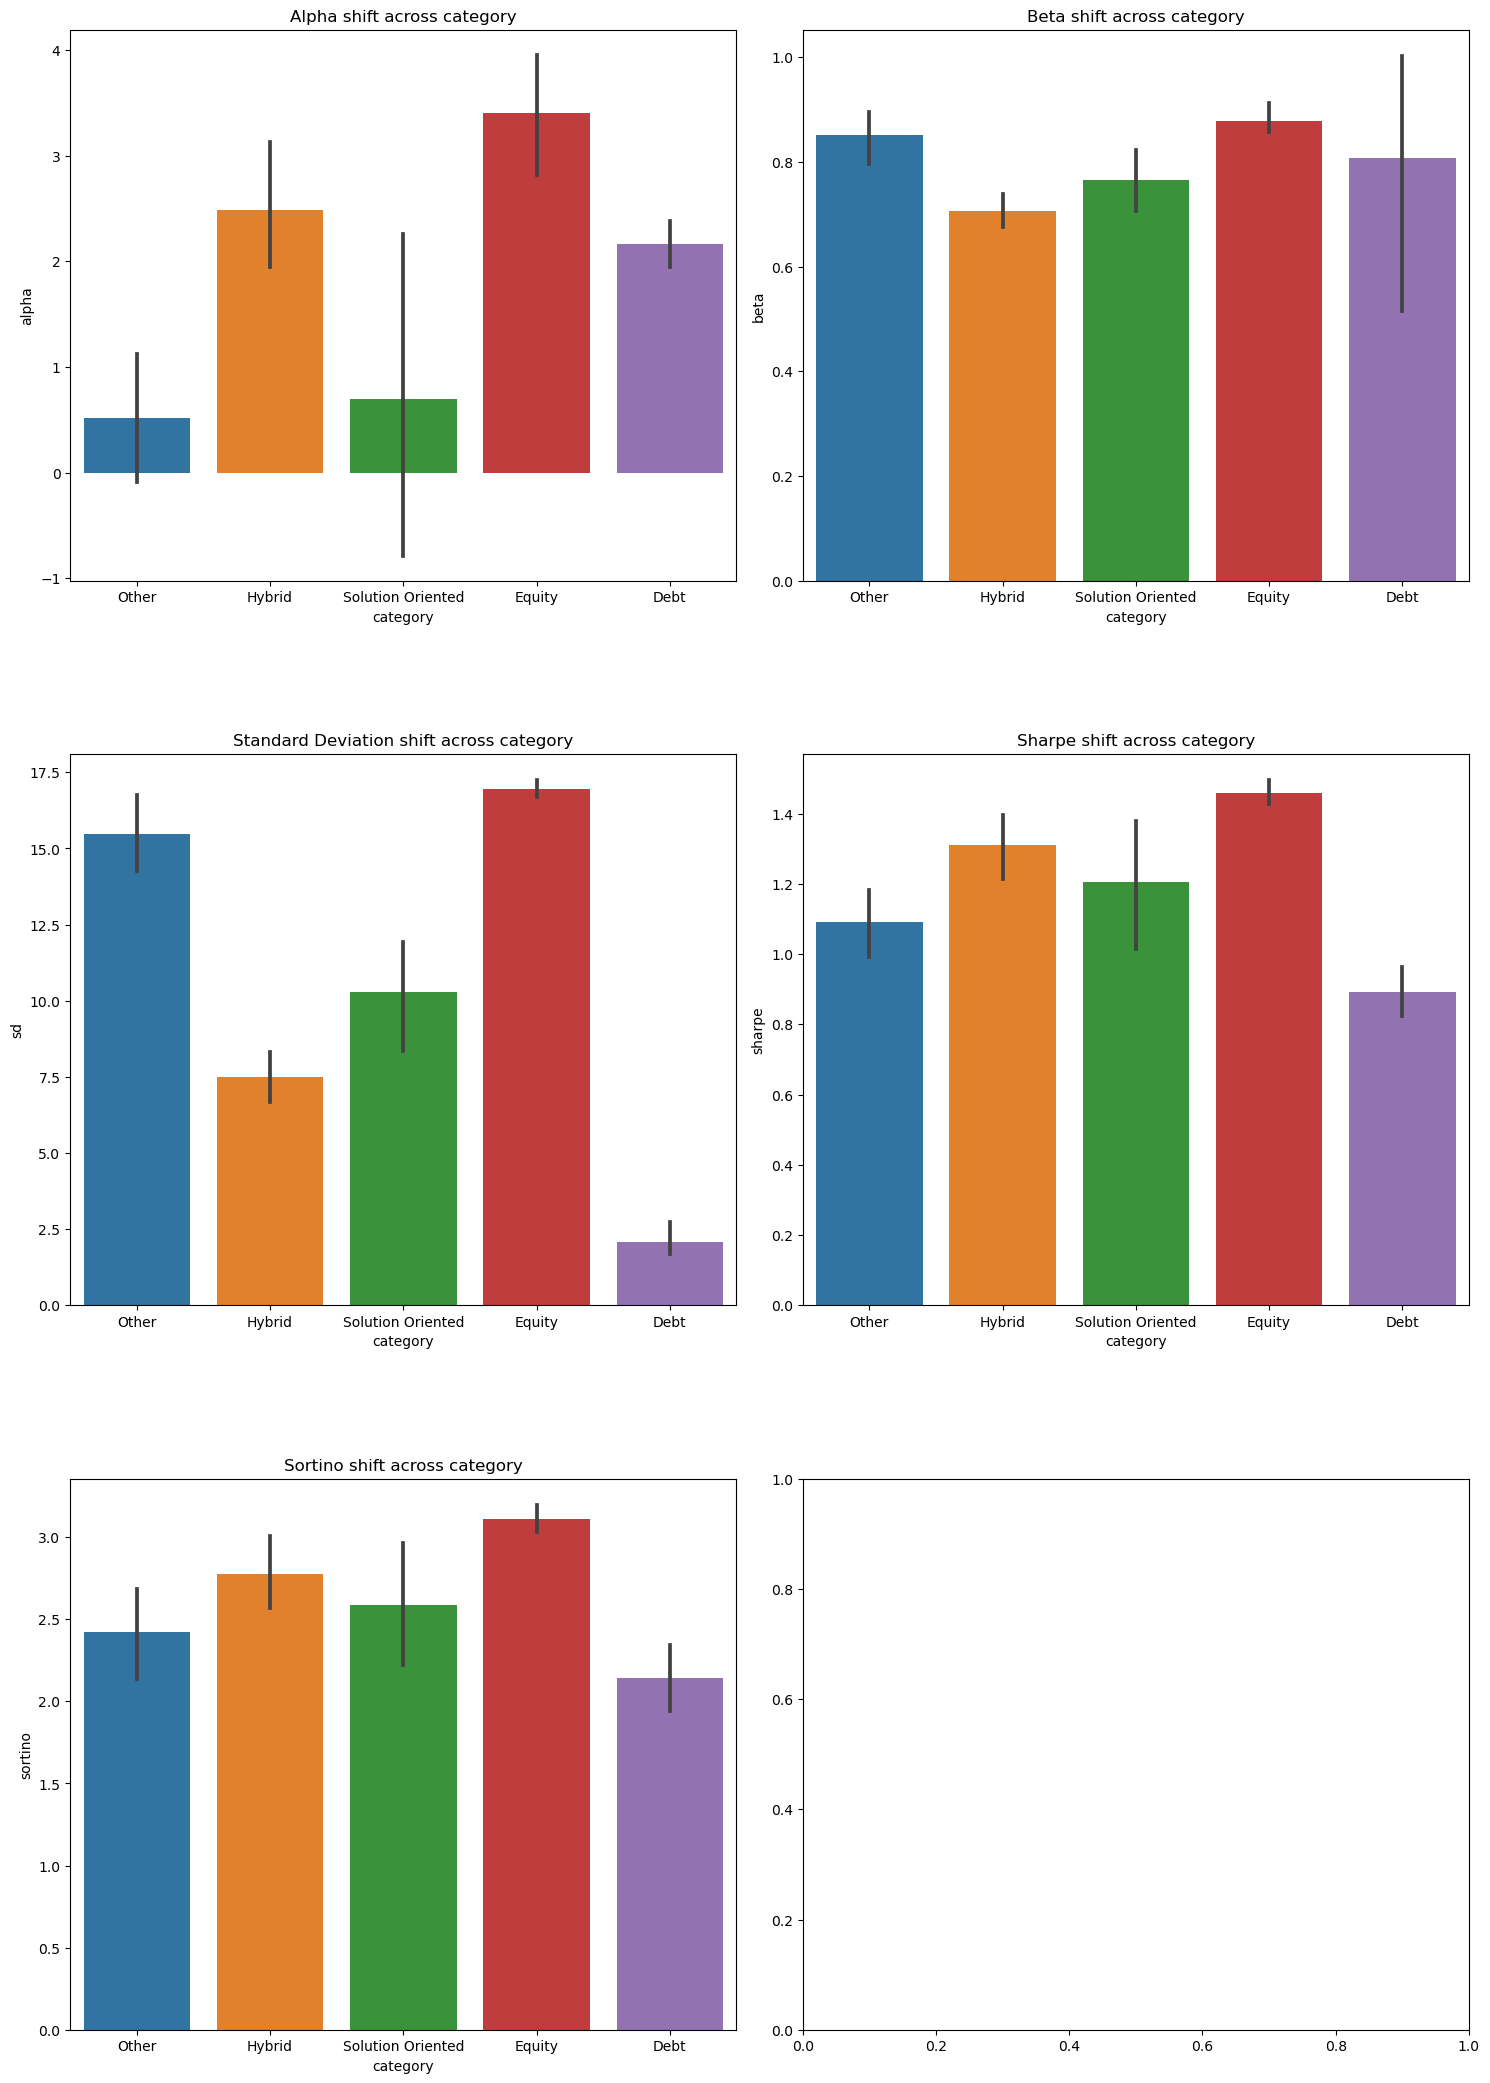

In [ ]:
#Category vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='category',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='category',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='category',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='category',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='category',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across category')
ax[0,1].set_title('Beta shift across category')
ax[1,0].set_title('Standard Deviation shift across category')
ax[1,1].set_title('Sharpe shift across category')
ax[2,0].set_title('Sortino shift across category')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

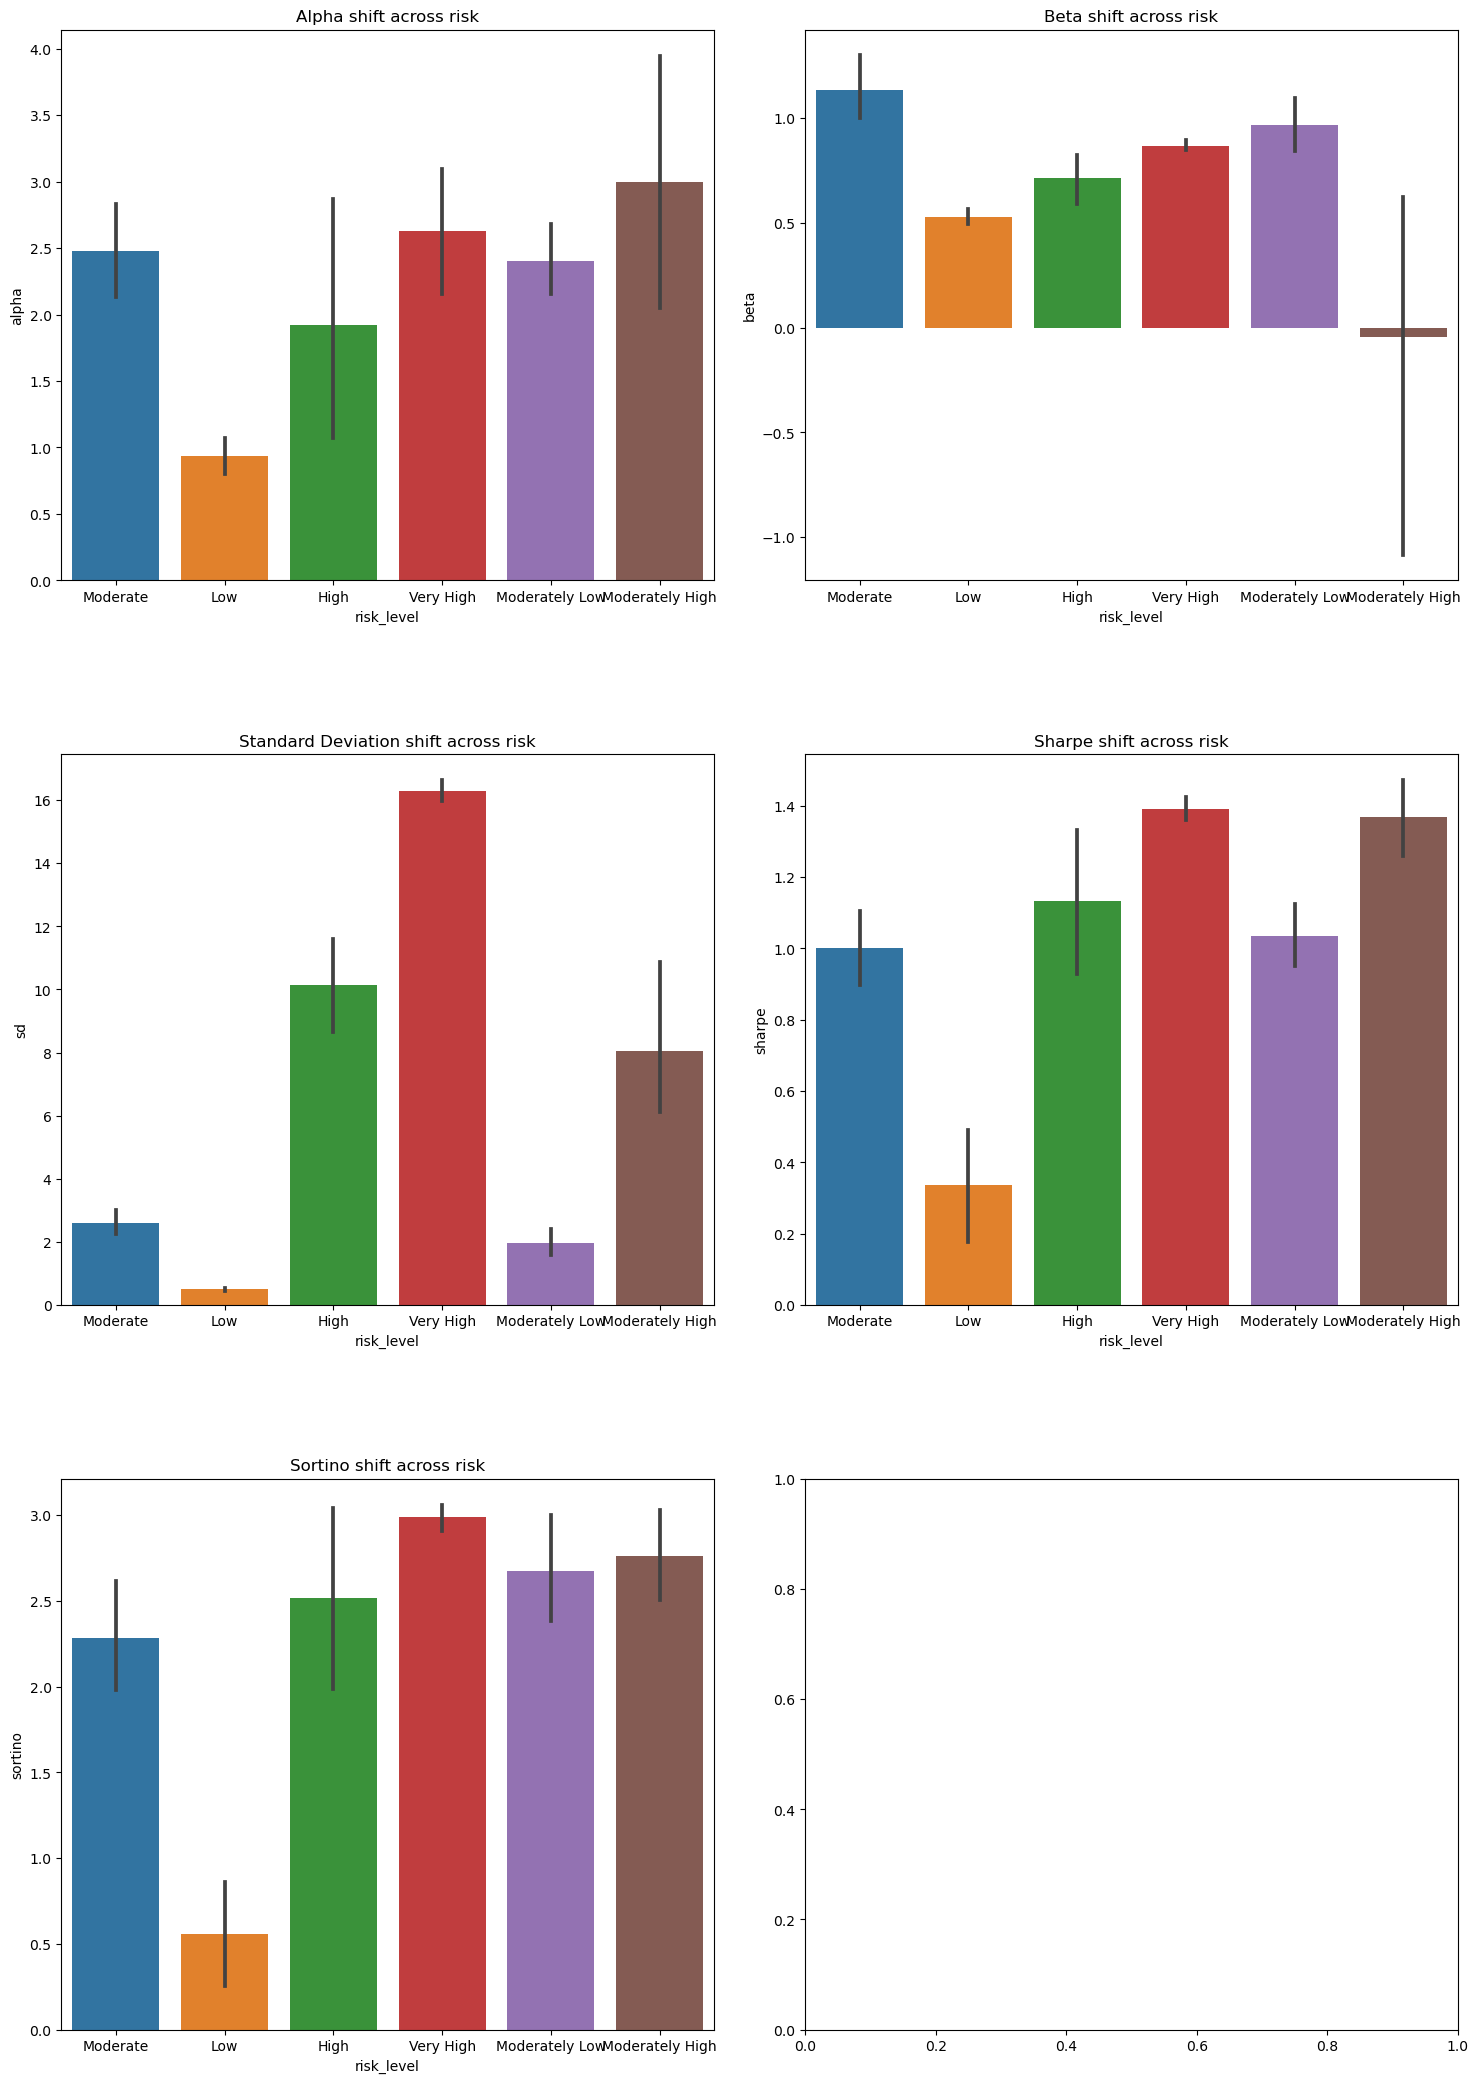

In [ ]:
#Risk vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='risk_level',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='risk_level',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='risk_level',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='risk_level',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='risk_level',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across risk')
ax[0,1].set_title('Beta shift across risk')
ax[1,0].set_title('Standard Deviation shift across risk')
ax[1,1].set_title('Sharpe shift across risk')
ax[2,0].set_title('Sortino shift across risk')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

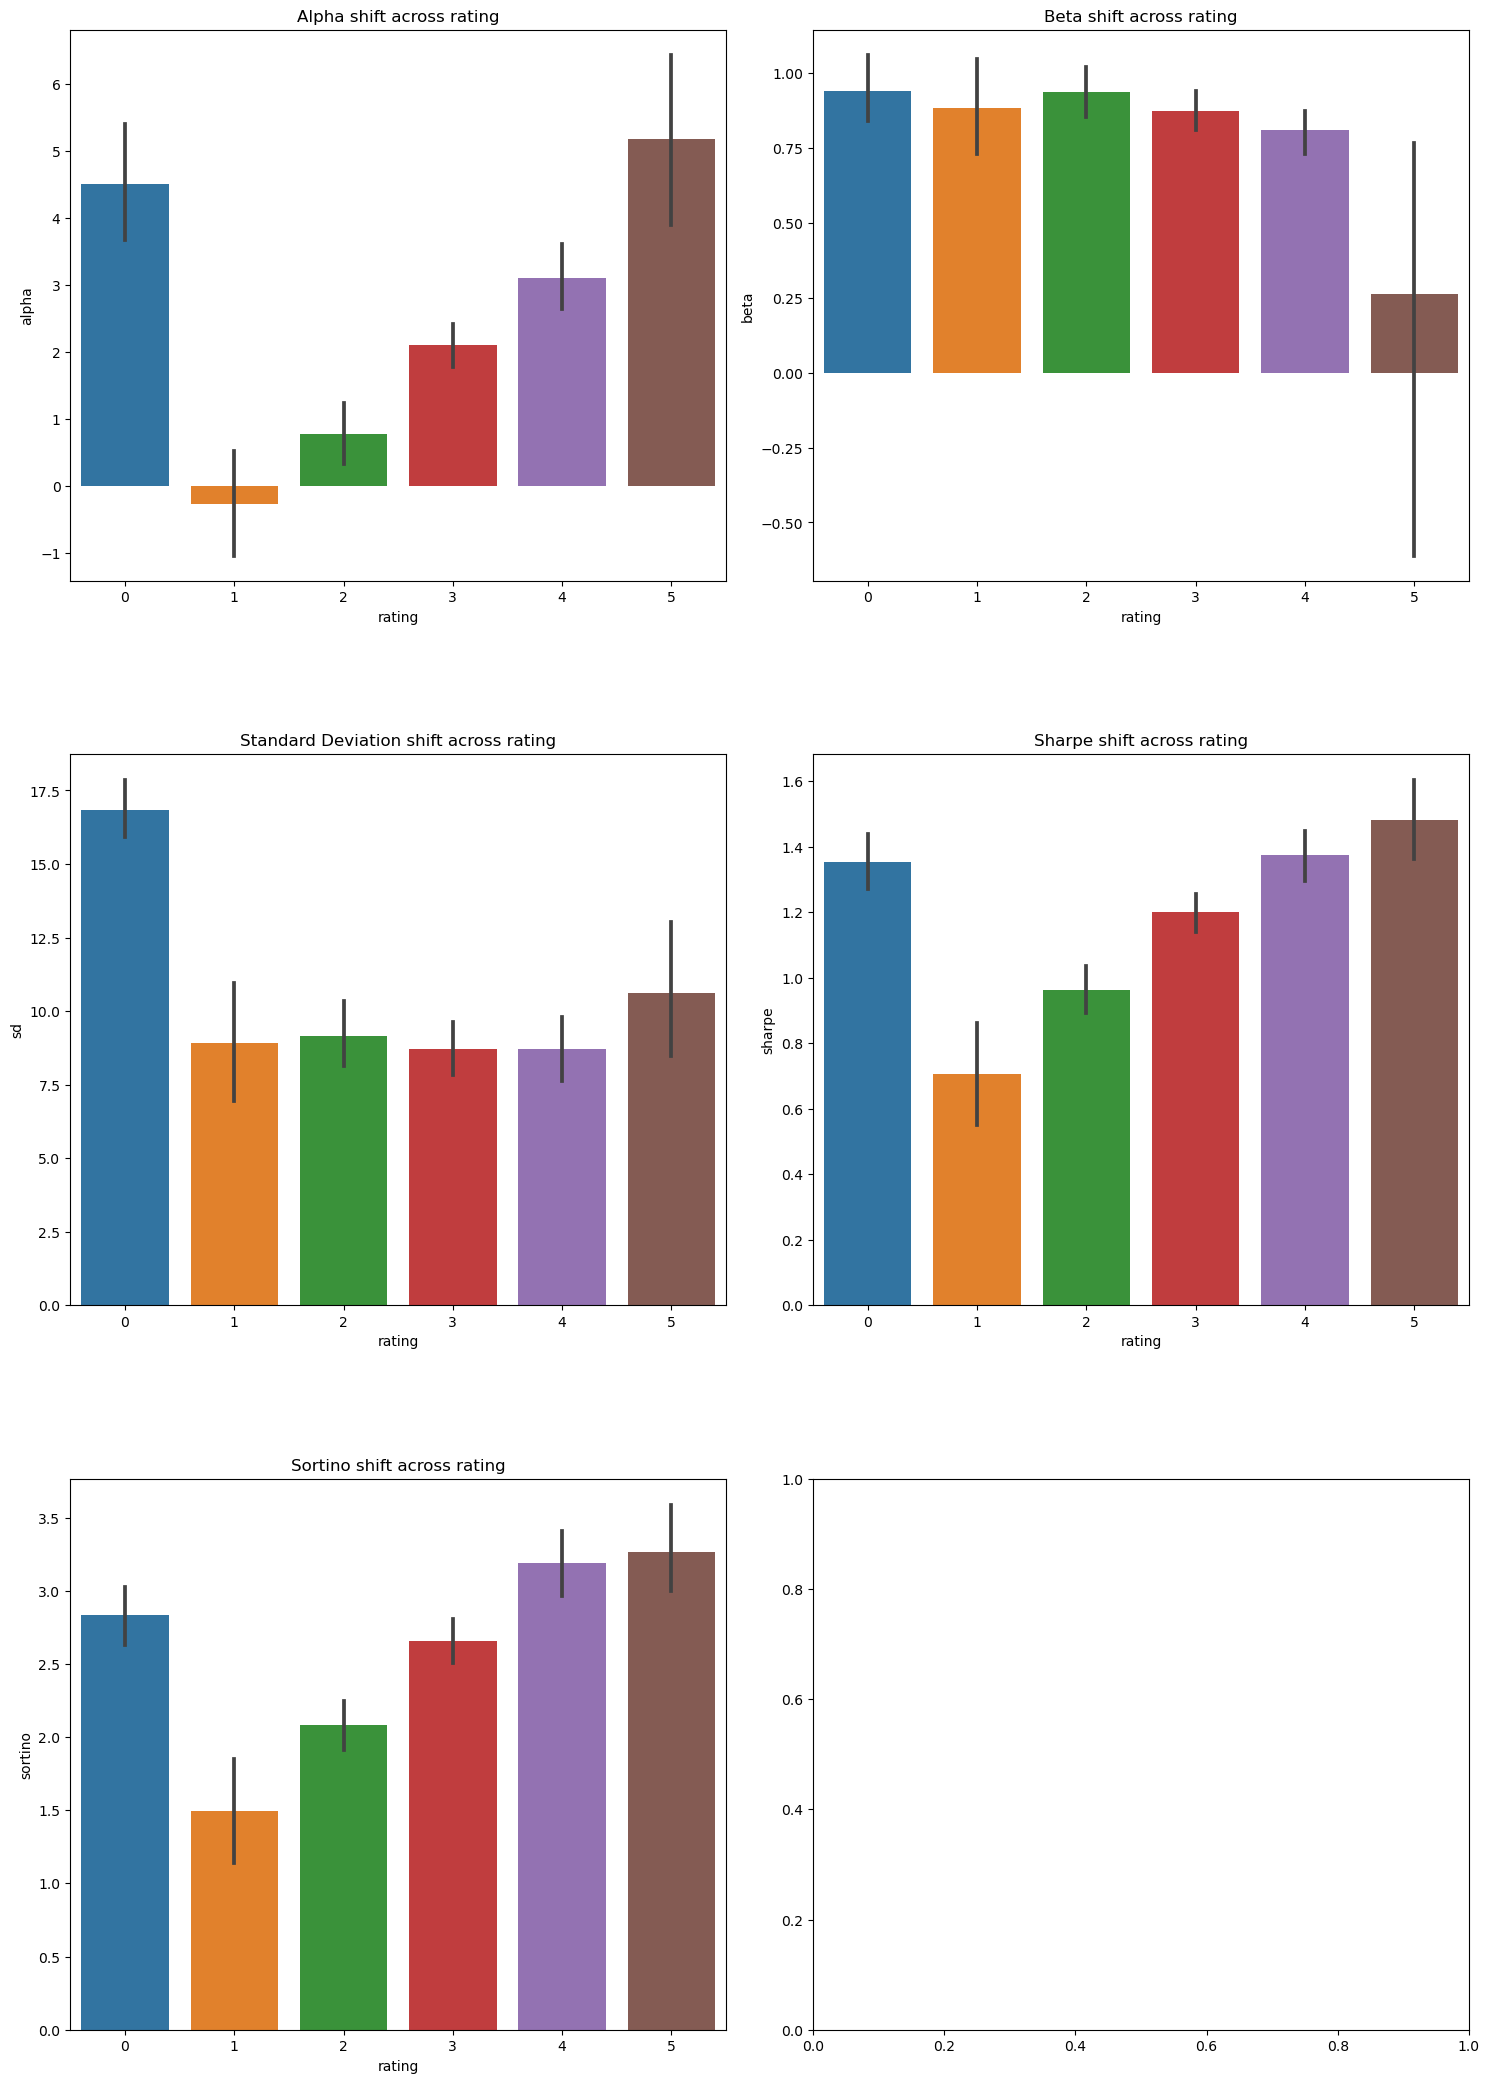

In [ ]:
#Rating vs Alpha, Beta, SD, Sharpe, Sortino
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))

sns.barplot(dataset,x='rating',y='alpha', ax=ax[0,0])
sns.barplot(dataset,x='rating',y='beta', ax=ax[0,1])
sns.barplot(dataset,x='rating',y='sd', ax=ax[1,0])
sns.barplot(dataset,x='rating',y='sharpe', ax=ax[1,1])
sns.barplot(dataset,x='rating',y='sortino', ax=ax[2,0])

ax[0,0].set_title('Alpha shift across rating')
ax[0,1].set_title('Beta shift across rating')
ax[1,0].set_title('Standard Deviation shift across rating')
ax[1,1].set_title('Sharpe shift across rating')
ax[2,0].set_title('Sortino shift across rating')

plt.tight_layout()
plt.subplots_adjust(bottom=5,top=7)
plt.show()

D:\App downloads\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


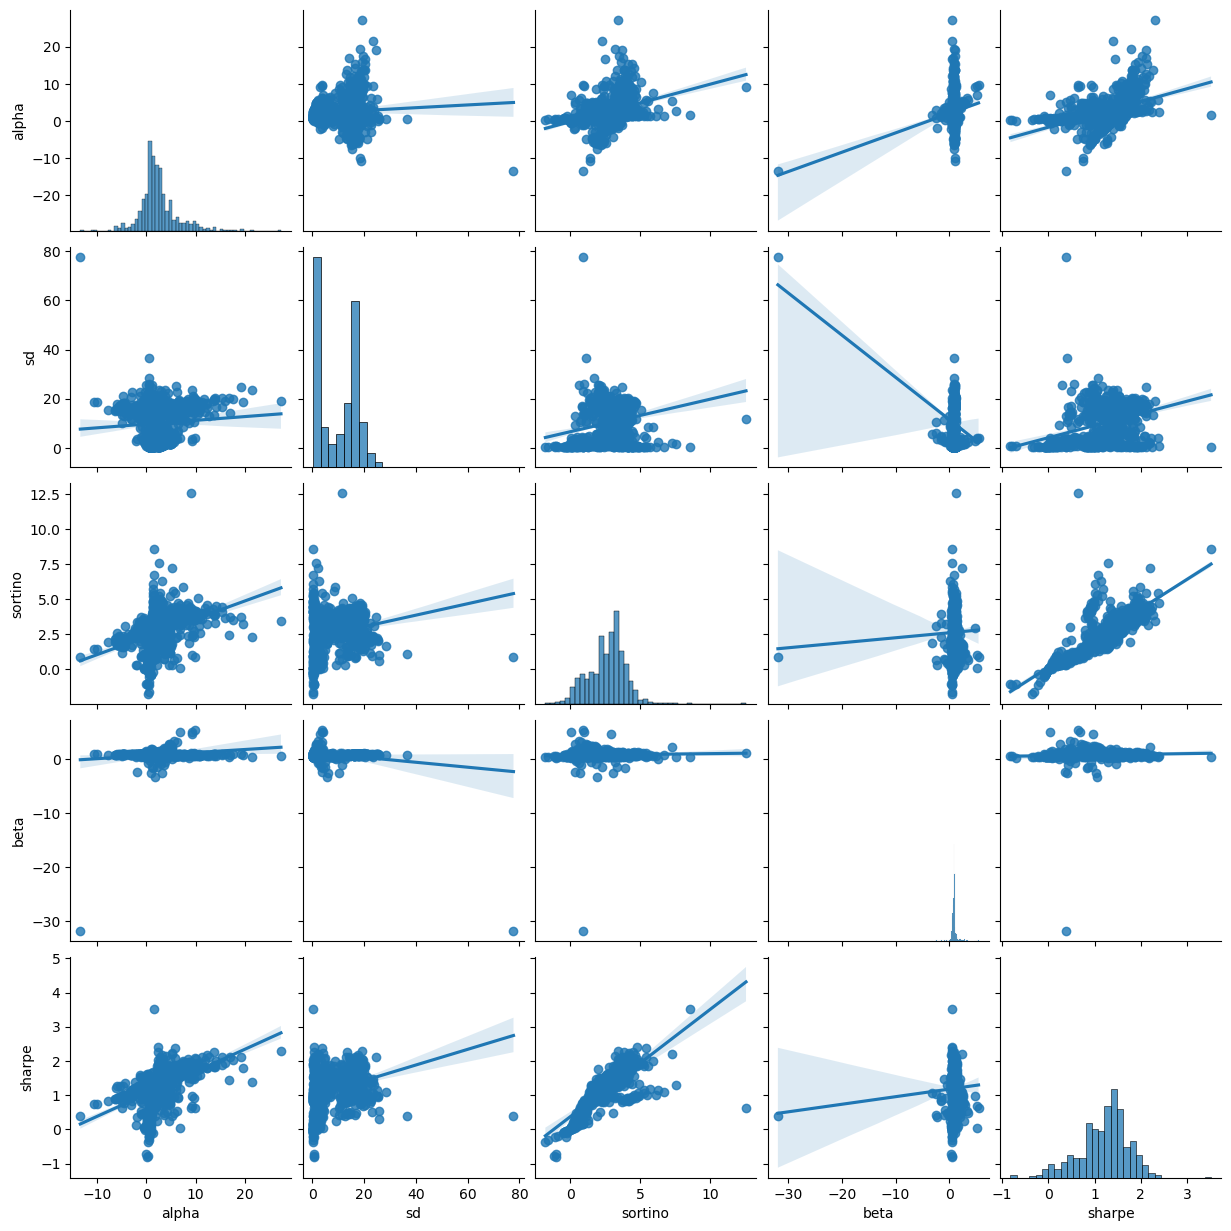

In [ ]:
sns.pairplot(dataset,vars=['alpha','sd','sortino','beta','sharpe'],kind='reg')

conclusion

Sharpe and Alpha are positively correlated.

Sortino and Sharpe are positively correlated.

Sortino and Alpha are positively correlated.

# Linear Regression Model

In [ ]:
# Select relevant features (X) and target variable (Y)
X = dataset[['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe']]
# Assuming interested in predicting returns_1yr
y = dataset["returns_1yr"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

D:\App downloads\Python\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hari Krishna\AppData\Local\Temp\ipykernel_60300\1975357473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(y_train))
D:\App downloads\Python\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Skewness: 2.63')

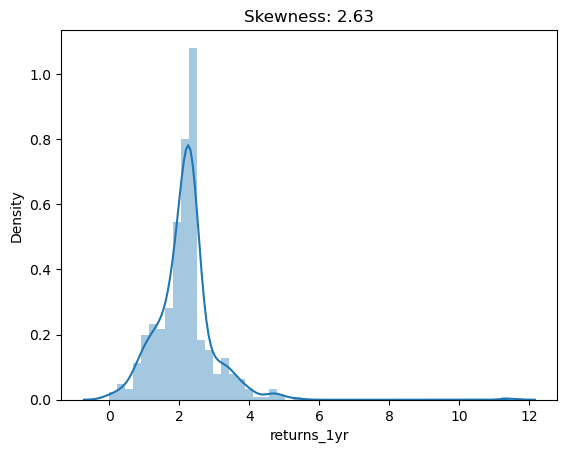

In [ ]:
sns.distplot(np.sqrt(y_train))
plt.title(f'Skewness: {np.round(np.sqrt(y_train).skew(),2)}')

In [ ]:
X_train.shape

(651, 10)

In [ ]:
X_test.shape

(163, 10)

In [ ]:
# Model building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model predictions
prediction = model.predict(X_test)
prediction

array([ 2.15358288,  1.59564201,  1.54657057,  4.49138627,  1.58582306,
        6.89027696,  1.32649123,  7.00391577,  2.63301752,  0.64688148,
        0.64281414,  3.79130309,  3.99885428,  4.28850233,  5.27915462,
        5.4859802 ,  2.24197526,  4.53351089,  9.27524667,  6.9936458 ,
        0.16889949,  7.93058904,  7.75336297,  1.28562268,  1.19242898,
        4.83205301,  9.00167835,  1.12793104,  2.34895045,  1.29961049,
        1.34074039,  5.89637239,  9.55709069,  3.18763881,  2.6886878 ,
        3.98899434,  1.21323887,  0.8748396 ,  4.6606387 ,  3.74803558,
        4.5041223 ,  5.86673146,  3.45316963, -1.15642147,  4.81152826,
        0.98716899,  3.03293306,  3.91498879,  4.11194249,  2.79907516,
        5.18584322,  6.4902273 ,  6.83518147,  2.97562761, 10.43876387,
        8.51898859,  0.75458792,  0.95254953,  6.92427592,  3.9810541 ,
        0.55090956,  5.36185188,  6.43810997,  4.85431691,  1.78459597,
        3.58157446,  4.42016325,  2.59059296,  4.38915613,  2.43

In [ ]:
# Model interpretation
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

         Feature  Coefficient
0        min_sip    -0.001066
1    min_lumpsum     0.000061
2  expense_ratio    -0.198763
3   fund_size_cr    -0.000027
4    fund_age_yr     0.141247
5        sortino     0.661047
6          alpha     0.610193
7             sd    -0.160430
8           beta    -3.927490
9         sharpe    -1.810492


In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Model evaluation
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:",r_squared)
print("mae:", mae)

Mean Squared Error: 18.911536356111053
R-squared: -0.0122613282343218
mae: 2.9976056882035538


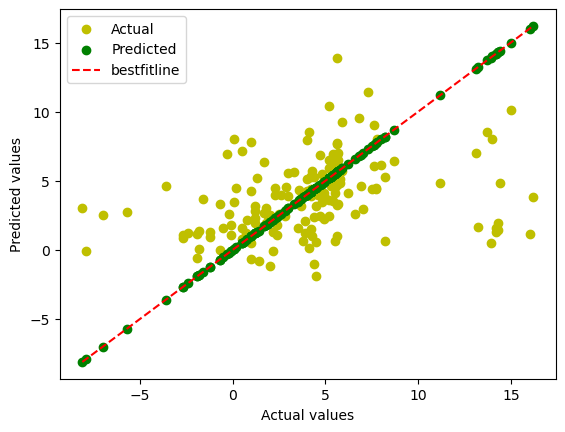

In [ ]:
plt.scatter(y_test, prediction, c='y', label='Actual')
plt.scatter(y_test, y_test, c='g', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='bestfitline')
plt.legend()